In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.signal as ss

**Q.1.(a) Write python from scratch for 2D Linear convolution sing Toeplitz matrix method between input=np.array([[1,2,3],[4,5,6],[7,8,9]])and filter=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])**

In [3]:
def getH1(a, n, m):
    
    """
    This function will return a Toeplitz matrix of size (n,m) from the a row-vector input 'a'
    Input
        a: 1d array
        n, m: int
    Output:
        H1: numpy nd-array(2d), Toeplitz matrix formed from 'a'.
    """
    H1 = np.zeros([n, m])
    for i in range(m):
        H1[:, i] = a
        a = np.insert(a, 0, 0)
        a = np.delete(a, -1)
    return H1

def get_toeplitz(data, kernel):
    
    """
    This function will calculate the H matrix for given kernel using dimension of input data
    Input:
        data, kernel: 2D array
    Output:
        H matrix 
    """
    
    # get the shape of data, kernel
    m1, n1 = data.shape
    m2, n2 = kernel.shape
    
    # create a 2d array of required size, with zero padding the elements in kernel
    h = np.zeros([(m1+m2-1), (n1+n2-1)])
    m, n = h.shape
    h[m-m2:, 0:n2] = kernel
    
    #print("data: ", (m1, n1), "kernel:", (m2, n2), "req: ", (m,n))
    
    # create a 1st column of Toeplitz matrix, which contains H1, H2, ...., Hm
    # using funtion getH1
    H_ = np.zeros([n*m, n1])
    #H1[n, 0:m] = H1, H1[n, m:2m] = H2 ........
    for k in range(1, m):
        H_[(k-1)*n:k*n, :] = getH1((h[m-k, :]).T, n, n1)
        
    #print("H_\n")
    #print(H_)
    #print(H_.shape)
    
    H = np.zeros([n*m, m1*n1])
    H[:, 0:n1] = H_
    
    mH_, nH_ = H_.shape
    
    # using this loop extend the remaining columns of H matrix
    for j in range(1, m1):
        a = np.zeros(H_.shape)
        #print(H_[n*(m-j):, :].shape)
        a[0:n, :] = H_[mH_- n:, :]
        a[n:, :] = H_[0:mH_-n, :]
        H[:, (j*n1):(j+1)*n1] = a
        H_ = a
        
    #print("H\n")
    #print(H)
    return H

    
def conv2D_toeplitz(data, kernel, flag = 'full', H_flag = 0, H = np.empty([1, 1])):
    
    """
    This function will do the multiplication of H and f, i.e. g = H.f
    Input
        data, kernel
    Output:
        g: 2d array, convolution of input data and kernel using Toeplitz matrix
    """
    
    # get the shape of data, kernel
    m1, n1 = data.shape
    m2, n2 = kernel.shape
    m, n = (m1+m2-1), (n1+n2-1)
    
    # prepre the f vector 
    f = np.reshape(np.flipud(data), -1)
    #print("\n")
    #print(f)
    
    # get toeplitz matrix for given kernel
    if(H_flag == 0 or H.shape == (1, 1)):
        H = get_toeplitz(data, kernel)
    
    # convolution
    g = np.dot(H, f)
    g = np.flipud(np.reshape(g, [m, n]))
    #print("g\n")
    #print(g)
    
    if(flag == 'same'):
        p, q = m1//2, n1//2
        return g[p:p+m2,q:q+n2 ]
    else:
        return g;

In [4]:
"""data = np.array([[3,4],[1, 2]])
kernel = np.array([[1, -1]])"""

"""data = np.array([[1,4,1],[2,5,3]])
kernel = np.array([[1,1],[1,-1]])"""


data = np.array([[1,2,3],[4,5,6],[7,8,9]])
kernel = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

t = time.time()
print(conv2D_toeplitz(data, kernel))
print("time required: ", time.time()-t)

[[  1.   4.   8.   8.   3.]
 [  4.  13.  20.  17.   6.]
 [  6.  18.  24.  18.   6.]
 [ -4. -13. -20. -17.  -6.]
 [ -7. -22. -32. -26.  -9.]]
time required:  0.0


In [5]:
#ss.convolve2d(np.array([[1, 4, 1], [2, 5, 3]]), np.array([[1, 1], [1, -1]]), 'same')
t = time.time()
print(ss.convolve2d(data, kernel, 'full'))
print("time required: ", time.time()-t)

[[  1   4   8   8   3]
 [  4  13  20  17   6]
 [  6  18  24  18   6]
 [ -4 -13 -20 -17  -6]
 [ -7 -22 -32 -26  -9]]
time required:  0.0


**Q1 (b).Write python from scratch for 2D Linear convolution by Toeplitz matrix method between input image(lena.jpg) and kernel = np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]]))/16**

In [6]:
def conv2D_image(imgG, kernel, flag = "full"):
    
    """
    Convolution of img and kernel using Toeplitz matrix
    
    """
    
    m, n = imgG.shape
    m1, n1 = kernel.shape
    row, col = (m+m1-1), (n+n1-1)
    
    convImg = np.zeros([row, col])
    m2, n2 = m1//2, n1//2
    #print(m1, n1)

    # get_toeplitz
    H = get_toeplitz(np.zeros(kernel.shape), kernel)
    
    t = time.time()
    for i in range(m2+1, m-m2):
        for j in range(n2+1, n-n2):
            convImg[i-m2-1:(i+m2+2), (j-m2-1):(j+m2+2)] = convImg[i-m2-1:(i+m2+2), (j-m2-1):(j+m2+2)] + conv2D_toeplitz(imgG[i-m2:(i+m2+1), j-m2:(j+m2+1)], kernel, flag, 1, H)
    
    print("Time required: ", time.time()-t)
    
    return convImg

In [7]:
from PIL import Image
img = np.asarray(Image.open("greyscale_lenna.jpg"))
imgG = np.mean(img, axis=2)

kernel = np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]])/16

convImg = conv2D_image(imgG, kernel)
print(convImg.shape)


t = time.time()
convR = ss.convolve2d(imgG, kernel, 'full')
print("Time required (scipy convolution): ", time.time()-t)
convR.shape

Time required:  10.802456617355347
(514, 514)
Time required (scipy convolution):  0.031241416931152344


(514, 514)

Text(0.5,1,'scipy')

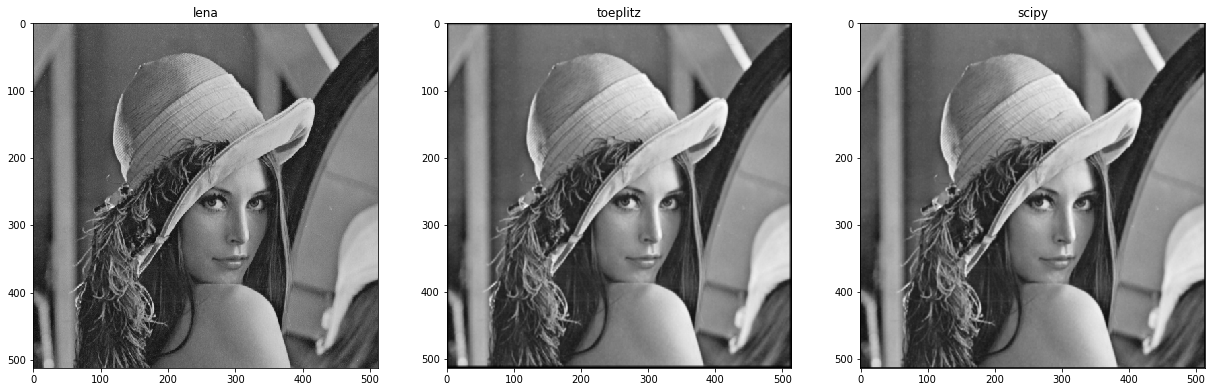

In [8]:
img = plt.imread('greyscale_lenna.jpg', 0)
fig, ax = plt.subplots(1,3, figsize=(21, 21))

ax[0].imshow(img, cmap='gray')
ax[0].set_title('lena')

ax[1].imshow(convImg, cmap='gray')
ax[1].set_title('toeplitz')

ax[2].imshow(convR, cmap='gray')
ax[2].set_title('scipy')

**Q1 (c) Compute number of multiplications required for 2D  linear convolution**

In [9]:
no_mul = convImg.size*kernel.size
print("No of multiplication in 2D linear convolution : {}".format(no_mul))

No of multiplication in 2D linear convolution : 2377764


**Q. 2. (a)Write python from scratch for 2D Spatial Separable convolution between input image(lena.jpg) and Gausian filter = np.array ([1,4,6,4,1], [4,16,24,16,4], [6,24,36,24,6], [4,16,24,16,4], [1,4,6,4,1])/256**

In [10]:
def conv2d_sep(data, kernel):
    
    """
    2D Separatble convolution
    """
    # decompose 1 - 2d kernel to 2 1d kernels, h1 and h2
    U, S, V = np.linalg.svd(kernel)
    h1 = -1*U[:,0] * np.sqrt(S[0])
    h2 = -1*V[0] * np.sqrt(S[0])
    
    m, n = data.shape
    
    inter = np.zeros([m+2, n])
    inter[1:m+1, :] = data
    m_inter, n_inter = inter.shape
    #print("inter shape: {},{}".format(m_inter, n_inter))
    
    L = len(h1)
    inter1 = np.zeros(data.shape)
    
    # convolution with h1
    for i in range(m_inter-L+1):
        for j in range(n_inter):
            #print(i, j, inter[i:(L+i), j])
            inter1[i, j] = np.dot(inter[i:(L+i), j], h1)

    inter2 = np.zeros([m, n+2])
    inter2[:, 1:n+1] = inter1
    result = np.zeros(data.shape)
    
    m_inter2, n_inter2 = inter2.shape
    
    #print(inter2)
    # convolution with h2
    for i in range(m_inter2):
        for j in range(n_inter2-L+1):
            #print(i, j, inter2[i, j:(L+j)])
            result[i, j] = np.dot(inter2[i, j:(L+j)], h2)
    
    return result

In [11]:
# test conv2d_sep
A = np.array([[10, 20, 30], [40, 50 , 60], [70, 80, 90]])
#print(A)
kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])

conv2d_sep(A, kernel)

array([[210., 360., 330.],
       [520., 800., 680.],
       [570., 840., 690.]])

In [12]:
from PIL import Image
img = np.asarray(Image.open("greyscale_lenna.jpg"))
imgG = np.mean(img, axis=2)
kernel1 =  np.array([[1,4,6,4,1], [4,16,24,16,4], [6,24,36,24,6], [4,16,24,16,4], [1,4,6,4,1]])/256

t = time.time()
convImg = conv2d_sep(imgG, kernel1)
print("Time required: {}".format(time.time() -t))

convR = ss.convolve2d(imgG, kernel1, 'full')

Time required: 2.1279640197753906


Text(0.5,1,'scipy')

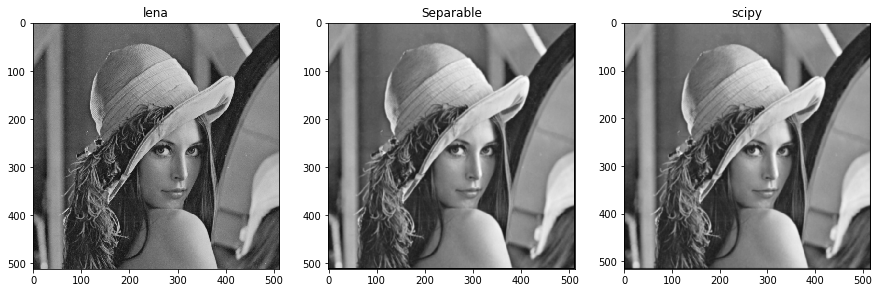

In [13]:
img = plt.imread('greyscale_lenna.jpg', 0)
fig, ax = plt.subplots(1,3, figsize=(15,15))

ax[0].imshow(img, cmap='gray')
ax[0].set_title('lena')

ax[1].imshow(convImg, cmap='gray')
ax[1].set_title('Separable')

ax[2].imshow(convR, cmap='gray')
ax[2].set_title('scipy')

In [30]:
no_mul_sep = 2*convImg.size*kernel.shape[0]
print("No of multiplication in 2D separable convolution : {}".format(no_mul_sep))

No of multiplication in 2D separable convolution : 1572864


**Q. 3. Write python from scratch to convert RGB Image (lena.tif) to YUV color image using the following equation.**

**Y =  0.299R + 0.587G + 0.114B**

**U = -0.147R - 0.289G + 0.436B**

**V =  0.615R - 0.515G - 0.100B**

In [15]:
def RGB2YUV():
    
    """
    RGB to YUV colorspace
    """
    
    img = plt.imread("lena.tif")
    R = img[:, :, 0]
    G = img[:, :, 1]
    B = img[:, :, 2]
    
    Y =(0.299*R + 0.587*G + 0.114*B)
    U = (-1*0.147*R - 0.289*G + 0.436*B)
    V = (0.615*R - 0.515*G - 0.100*B)
    
    tf_img = np.zeros(img.shape)
    tf_img[:, :, 0] = np.asarray([Y])
    tf_img[:, :, 1] = np.asarray([U])
    tf_img[:, :, 2] = np.asarray([V])
    
    tf_img = (tf_img - tf_img.min())/((tf_img.max() - tf_img.min()))
    
    return tf_img

Text(0.5,1,'YUV')

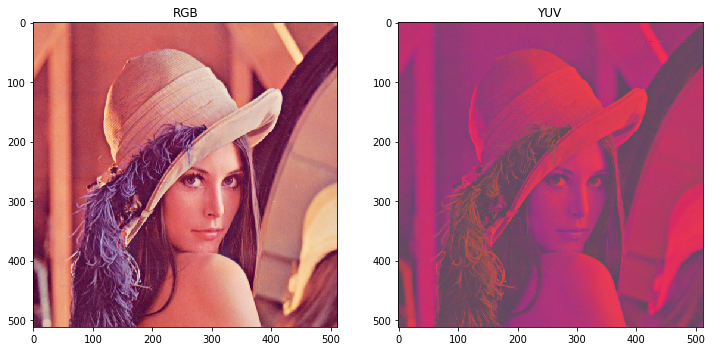

In [26]:
img = plt.imread("lena.tif")

fig, ax = plt.subplots(1,2, figsize=(12, 8))

ax[0].imshow(img)
ax[0].set_title('RGB')
ax[1].imshow(RGB2YUV())
ax[1].set_title('YUV')

**Q. 4. Write python from scratch to convert RGB Image (lena.jpg)  to YCbCr color image using following equation.**

**Y= 16 + 65.738*R/256 + 129.057*G/256 + 25.064*B/256**

**Cb = 128-37.945*R/256 - 74.494*G/256 + 112.439*B/256**

**Cr = 128+112.439*R - 94.154*G/256 - 18.285*B/256**

In [17]:
def RGB2YCbCr():
    
    """
    RGB to YCbCr colorspace
    """
    
    img = plt.imread("greyscale_lenna.jpg")
    R = img[:, :, 0]
    G = img[:, :, 1]
    B = img[:, :, 2]
    
    Y = (16 + (65.738*R + 129.057*G + 25.064*B)/256)/256
    Cb = (128 - (37.945*R - 74.494*G + 112.439*B)/256)/256
    Cr = (128 + (112.439*R - 94.154*G - 18.285*B)/256)/256
    
    tf_img = np.zeros(img.shape)
    tf_img[:, :, 0] = np.asarray([Y])
    tf_img[:, :, 1] = np.asarray([Cb])
    tf_img[:, :, 2] = np.asarray([Cr])
    
    tf_img = (tf_img - tf_img.min())/((tf_img.max() - tf_img.min()))
    
    return tf_img

Text(0.5,1,'YCbCr')

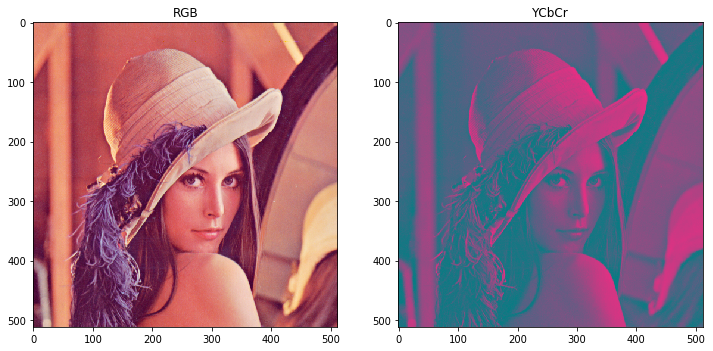

In [18]:
img = plt.imread("lena.tif")

fig, ax = plt.subplots(1,2, figsize=(12, 8))

ax[0].imshow(img)
ax[0].set_title('RGB')

ax[1].imshow(RGB2YCbCr())
ax[1].set_title('YCbCr')